## Addition arithmatic


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


### Dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
import random

input_range = range(0, 101)
n_classes = 201

x1_train = []
x2_train = []
for i in range(0,10000):
    x1_train.extend(input_range)
    x2_train.extend(input_range)

random.shuffle(x1_train)
random.shuffle(x2_train)

y_train = []

for i, val in enumerate(x1_train):
    y_train.insert(i, val + x2_train[i])
    

y_train = keras.utils.to_categorical(y_train, n_classes)
x1_train = np.array(x1_train)
x2_train = np.array(x2_train)

print(x1_train.shape)
print(x2_train.shape)

print(y_train[0])

(1010000,)
(1010000,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [5]:
x1_test = []
x2_test = []

for i in range(0,200):
    x1_test.extend(input_range)
    x2_test.extend(input_range)

random.shuffle(x2_test)
random.shuffle(x2_test)

y_test = []

for i, val in enumerate(x1_test):
    y_test.insert(i, val + x2_test[i])
    

y_test = keras.utils.to_categorical(y_test, n_classes)
x1_test = np.array(x1_test)
x2_test = np.array(x2_test)

print(x1_test.shape)
print(x2_test.shape)

print(y_test[0])

(20200,)
(20200,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [47]:
x_test = []
x_train = []

for i,x1 in enumerate(x1_test):
    x_test.append([x1/100, x2_test[i]/100])
    
for i, x1 in enumerate(x1_train):
    x_train.append([x1/100, x2_train[i]/100])
    
print(x_test[1])
print(np.argmax(y_test[1]))

[0.01, 0.95999999999999996]
97


In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Setting up our Network Hyper Parameters

In [52]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input1 = len(x1_train)
n_input2 = len(x2_train)
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 50 # 2nd layer number of neurons
n_hidden_3 = 10 # 2nd layer number of neurons
n_hidden_4 = 200 # 2nd layer number of neurons
n_hidden_5 = 100 # 2nd layer number of neurons
#n_classes = 10 # MNIST classes for prediction(digits 0-9 )


### This time we are going to make a functional model instead of a sequential model

In [53]:
Inp1 = Input(shape=(2,))
Inp2 = Input(shape=(1,))
Inp = keras.layers.concatenate([Inp1, Inp2])
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp1)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)

output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [54]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(inputs=Inp1, outputs=output)

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               10251     
Total params: 15,601
Trainable params: 15,601
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [57]:
K.set_value(model.optimizer.lr, learning_rate)

In [58]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 1010000 samples, validate on 20200 samples
Epoch 1/10
1010000/1010000 [==============================] - 54s - loss: 3.7805 - acc: 0.0533 - val_loss: 3.0230 - val_acc: 0.1390
Epoch 2/10
1010000/1010000 [==============================] - 54s - loss: 2.9684 - acc: 0.1026 - val_loss: 2.5855 - val_acc: 0.1780
Epoch 3/10
1010000/1010000 [==============================] - 54s - loss: 2.6847 - acc: 0.1333 - val_loss: 2.3551 - val_acc: 0.2314
Epoch 4/10
1010000/1010000 [==============================] - 54s - loss: 2.5143 - acc: 0.1553 - val_loss: 2.1966 - val_acc: 0.2329
Epoch 5/10
1010000/1010000 [==============================] - 54s - loss: 2.3968 - acc: 0.1731 - val_loss: 2.1166 - val_acc: 0.2832
Epoch 6/10
1010000/1010000 [==============================] - 54s - loss: 2.3088 - acc: 0.1886 - val_loss: 2.0297 - val_acc: 0.2899
Epoch 7/10
1010000/1010000 [==============================] - 54s - loss: 2.2407 - acc: 0.2010 - val_loss: 2.0153 - val_acc: 0.2935
Epoch 8/10
1010000/10100

In [37]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

{'val_loss': [5.1149439079926742, 5.1119709368979578, 5.1111823143345294, 5.1110822351852265, 5.1106973709446368, 5.1105499503636125, 5.1106344544061342, 5.1108510871924979, 5.1106917574854176, 5.1107806876154225], 'val_acc': [0.0099999997857035984, 0.0099999997764825821, 0.010198019574036692, 0.0095049502825973065, 0.010198019574036692, 0.010198019574036692, 0.010198019574036692, 0.00995049483631507, 0.0092574255356546679, 0.0092574255356546679], 'loss': [5.1448815959987071, 5.116229153482041, 5.1147842832130959, 5.1143855371097526, 5.1142045184881377, 5.1141402079327269, 5.1140708517320084, 5.1140671976958174, 5.1140381639310633, 5.1140452922216735], 'acc': [0.0096851483035353143, 0.0096801978087808823, 0.0098594057248296719, 0.0096574255322465809, 0.0098326730527131274, 0.009757425530564667, 0.009763366121724985, 0.0097009898873396446, 0.0098999997833282647, 0.0096346532551590171]}


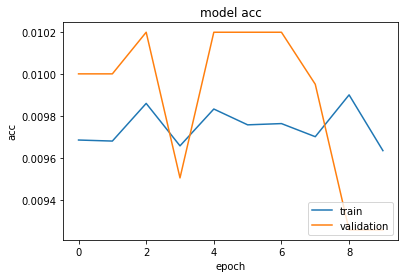

In [46]:
print(history.history)
plot_train(history)

In [70]:
pred = model.predict([x1_test[0:4], x2_test[0:4]] )
pred
for p in pred:
    print(p[(np.argmax(p))])
#score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

0.0143883
0.0143216
0.0143472
0.0143416
